# <center>Physiological Signals Processing</center>
## <center>Lab Unit 2: Electroencephalogram (EEG)</center>
### <center>Rebeca Goya Esteban, Óscar Barquero Pérez and Miguel Ángel Cámara Vázquez</center>

Updated: 9th March 2021.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International license</a>.  

The main objective of this second practice is to acquire and process electroencephalographic signals. 
We will use the following combination of software and hardware to record EEG signals:
- actiCAP Express: a 32-channel acquisition system. It uses dry electrodes. 
- actiCHamp: amplifier, battery and licenses. 
- BrainVision Recorder: signal-recording software.
- BrainVision Analyzer: software that allows us to visualize, pre-process and export previously recorded EEG signals.


In order to work with EEG signals, it is necessary to extract them from a series of binary files generated by the acquisition equipment (BrainVision). Each record has 3 different files:
* **.vhdr file:** it contains different headers to load the signals.
* **.vmrk file:** it contains those marks that were indicated on the record during the acquisition.
* **.eeg file:** it contains the whole record.

## Previous set-up

Although the BrainVision Analyzer software can export the records to raw-text format, we are going to use an specific toolbox of Python to load BrainVision-specific signals. This toolbox is [MNE-Python](https://mne.tools/stable/index.html), and it makes easier both preprocessing and analysis of different types of brain signals, like EEG, MEG (magnetoencephalography), sEEG (stereoencephalography) or ECoG (electrocorticography).

To install this toolbox, it is essential to run the following line in the Terminal (you should activate the environment of the subject before running it): `pip install mne`

## Preliminary questions
Before loading the signals, **open the header file with a text editor**, and describe some of the **parameters** that could be of interest, like:
1. Number of channels.
2. Sampling rate.
3. Resolution.

Using the available information in the header file, do you think that some kind of filtering has been done on the signal after the acquisition? Look at the _**Good Level**_ and _**Bad Level**_ parameters, la resistencia que oferecen los electrones respecto al craeno (si son secos habrá mas resistencia y la señal será peor, si son con gel la resistencia será mas baja y la señal será mejor). What type of parameters are they describing? Are they important in our acquisition set-up?

Finally, answer these questions:
1. What types of noise can be found on EEG signals?
2. What spectral components can be found on EEG signals?
3. Regarding the recorded channels, are the signals unipolar or bipolar? Why?
 Unipolares 

## Exercise 1.  Loading and visualization of EEG signals

For this practice, **we are going to use the MNE toolbox just to load the previously recorded signals**, since it allows to do it without exporting them to text. The following code loads an example record (please, modify it to load another record):

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mne.io as io_eeg

#we are going to read an example eeg which is in the folder EEG_example. The method returns a RAW men object
filename = 'Example/Neuromarketing3850.vhdr'
eeg_object = io_eeg.read_raw_brainvision(filename,preload = True) #the remaining parameters are left as default
print (eeg_object)

Extracting parameters from Example/Neuromarketing3850.vhdr...
Setting channel info structure...
Reading 0 ... 240139  =      0.000 ...   480.278 secs...
<RawBrainVision | Neuromarketing3850.eeg, 31 x 240140 (480.3 s), ~56.8 MB, data loaded>


The **_eeg_object_** variable is a raw object that has different methods and attributes. These are the most important attributes:
* **ch_names:** Names of the channels.
* **n_times:** Number of temporal points.
* **times:** times vector.
* **info: (dict)** [Measurement information](https://mne.tools/stable/generated/mne.Info.html#mne.Info). It is a data structure that contains different metadata of the loaded record.

Regarding the methods, the most important is the **get_data()** method, that allows us to access to the EEG signals.

At this point, perform these tasks:
1. Print the **name of the electrodes**.
2. Store the **whole record** on a different variable (eeg). Store the **times vector (t)** too, and compute the **sampling rate (fs) using this times vector _t_**. Assess the shape of the different matrices.
3. **Plot 10 seconds from the first channel**, with the X axis in seconds. Then, try to plot different 10-seconds sections.
4. Plot **wider and narrower sections of the signals**, and **zoom in on the plotted segment**.
5. **Plot another channel** that could be of interest.

In [5]:
## 1. Print the electrodes' names.
electrodes_name= eeg_object.ch_names
print(electrodes_name)

## 2. Store both EEG signals and times vector on different variables, and compute the sampling rate (fs).
eeg = eeg_object.get_data()
t = eeg_object.times
fs = 1/(t[1]-t[0])

print('EEG matrix shape: ', eeg.shape)
print('Times vector shape: ', t.shape)
print('Sampling rate (fs): %d Hz' %fs)

['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2']
EEG matrix shape:  (31, 240140)
Times vector shape:  (240140,)
Sampling rate (fs): 500 Hz


Text(0.5, 1.0, 'EEG channel')

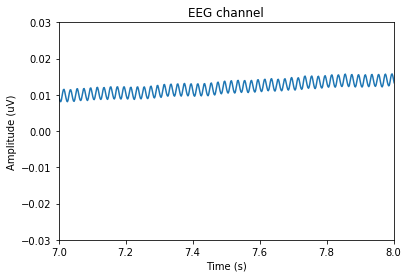

In [7]:
## 3, 4 and 5. Different plots.
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t,eeg[0,:]) #complete channel Fp1, only the first one but complete 
plt.xlim((7,8))
plt.ylim((-0.03,0.03))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title('EEG channel')

## Exercise 2.  Filtering
Signals that were plotted on Exercise 1 are **raw signals**, so it is necessary to perform some kind of pre-processing prior to the analysis to get rid of noise. For this purpose, the _signal_ toolbox from **_scipy_** is going to be used, since it contains a wide set of signal-processing functions. You can check the documentation at the following URL:

https://docs.scipy.org/doc/scipy/reference/signal.html

After that, perform the following pre-processing steps:

1. **Remove the linear trend of the signals** using $\mathcal{signal.detrend}$, plot and check the result. To see it properly, plot at least 30 s.
2. **Apply a notch filter on the detrended signal to remove the 50-Hz noise** ($\mathcal{signal.iirnotch}$ and $\mathcal{signal.filtfilt}$ should be used), plot and check the result. Test it on different channels. **Why do we filter at this frequency? Are there cases where we should not filter at this frequency?**
3. **Apply a band-pass FIR filter between 0.5 y 40 Hz on the detrended signal** ($\mathcal{signal.firwin}$ and $\mathcal{signal.filtfilt}$ should be used). Apply this methodology **on the notch-filtered signal and the original signal**, and compare the results. **Are there differences between the signals? Why are these cutoff frequencies chosen?**
4. **Plot the frequency response of the designed filters** using $\mathcal{signal.freqz}$.

In [ ]:
from scipy import signal

## 1. Perform detrend (it is possible to perform this detrend on the whole signal with just one command).
eeg_detrended = signal.detrend(eeg) #filter in every channel 

plt.figure()
plt.plot(t,eeg[0:,])           # Plot first channel (original)
plt.plot(t,eeg.detrend[0:,]) # Plot first channel (detrended)
plt.xlim((7,8))
plt.ylim((-0.03,0.03))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [uV]')
plt.legend(('Original','Detrended'))
plt.title('Original vs Detrended')

## 2. Design and apply a notch filter.
f0 = 50     # Frequency to be removed from the signal (Hz)
Q = 30.0    # Quality factor

b_notch, a_notch = signal.iirnotch(f0, Q, fs)  # Create notch filter
eeg_notch = signal.filtfilt(b_notch,a_notch, eeg_detrended) # Apply filter

plt.figure()
plt.plot(t,eeg.detrend[0:,])  # Plot first channel (detrended)
plt.plot(t,eeg.iirnotch [0:,]) # Plot first channel (notch-filtered)
plt.xlim((7,8))
plt.ylim((-0.03,0.03))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [uV]')
plt.legend(('Detrended','Notch-filtered'))
plt.title('Detrended vs Notch-filtered')

## 3. Design and apply a FIR bandpass filter.
f_low = 0.5       # Low cutoff frequency
f_high = 40        # High cutoff frequency
numtaps = 64       # Filter length

b_bp= signal.firwin(numtaps,[f_low ,f_high], pass_zero=False,fs=fs) # Create FIR bandpass filter

eeg_dt_bandpass = ...    # Apply filter (detrended signals)
eeg_nt_bandpass = ...        # Apply filter (notch-filtered signals)
eeg_orig_bandpass = ...            # Apply filter (original signals)

## Plot comparison between signals
plt.figure(figsize=[20,20])
plt.subplot(221)
plt.plot(...)
plt.plot(...)
plt.xlim((7,8))
plt.ylim((-0.03,0.03))
plt.ylabel('Amplitude [uV]')
plt.legend(('Detrended','Detrend+Bandpass'))
plt.title('Detrended vs Detrend+Bandpass')

plt.subplot(222)
plt.plot(...)
plt.plot(...)
plt.xlim((7,8))
plt.ylim((-0.03,0.03))
plt.legend(('Notch-filtered','Notch+Bandpass'))
plt.title('Notch-filtered vs Notch+Bandpass')

plt.subplot(223)
plt.plot(...)
plt.plot(...)
plt.xlim((7,8))
plt.ylim((-0.03,0.03))
plt.ylabel('Amplitude [uV]')
plt.xlabel('Time [s]')
plt.legend(('Original','Bandpass only'))
plt.title('Original vs Bandpass only')

plt.subplot(224)
plt.plot(...)
plt.plot(...)
plt.plot(...)
plt.xlim((7,8))
plt.ylim((-0.03,0.03))
plt.xlabel('Time [s]')
plt.legend(('Detrend+Bandpass','Notch+Bandpass','Bandpass only'))
plt.title('Detrend+Bandpass vs Notch+Bandpass vs Bandpass only')

## 4. Plot frequency response of the filters
w_notch, h_notch = ...     # Frequency response of the notch filter
w_bp, h_bp = ...                       # Frequency response of the bandpass filter

plt.figure(figsize=[15,5])
...

# Exercise 3. Non-parametric spectral estimation


a) Given the next signal:

$$x_1[n] = A_1\sin{(n\omega_1 + \phi_1)} +A_2\sin{(n\omega_2 + \phi_2)}$$ 

where $A_1=A_2=5$, $\omega_1=0.4\pi$, $\omega_2=0.25\pi$, $\phi_1=0$ and $\phi_2=\pi/3$, **plot $x_1[n]$ and its periodogram**, using $L=128$ as signal length.

b) Then, consider the next signal:
$$x_2[n] = A_1\sin{(n\omega_1 + \phi_1)} +A_2\sin{(n\omega_2 + \phi_2)} + v[n]$$

In this case, $\phi_1$ y $\phi_2$ are **uniformly-distributed random variables** on the $[0,2\pi]$ interval, and $v[n]$ is an **AWGN process whose variance is 1**. Compute the signals for $N_{sim}=50$ (store them on a list o numpy array to use them later), their periodograms, and the average periodogram. Use one of the available functions at $\mathcal{numpy.random}$ to add both noise and $\phi_1$ and $\phi_12$.

c) What happens on the periodogram if we change the length of the signal (L)?

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import *

def periodogram(x,Nfft):
    
    N = len(x)
    x_f = fft(x,Nfft) 
    Px = (np.abs(x_f)**2) / N
    Px = fftshift(Px)
    f = fftshift(fftfreq(Nfft))
    return Px, f
    

## Exercise 3 A)
A1, A2, omega1, omega2 = ...     # Define the parameters of the signal
phi1 = ...
phi2 = ...

L = ...    # Length of the signal
n_L = np.arange(0, L)
nfft = 1024

x1 = ...    # Compute the signal
P_x1, f_x1 = ...     # Compute the periodogram

plt.figure(figsize=[15,5])
plt.subplot(131)
plt.plot(...)
plt.title('$x_1[n]$')
plt.xlabel('$n$')
plt.ylabel('$x_1[n]$')

plt.subplot(132)
plt.plot(...)
plt.title('Periodogram of $x_1[n]$')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')

plt.subplot(133)
plt.plot(...)
plt.xlim(...)
plt.title('Periodogram of $x_1[n]$ (only positive frequencies)')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')


## Exercise 3 B)
PSD_x2 = []
x2_signals = []
Nsim = 50
for n in range(Nsim):
    phi1 = ...
    phi2 = ...
    v_n = ...
    x2 = A1*np.sin(omega1*n_L + phi1) + A2*np.sin(omega2*n_L + phi2) + v_n   # Compute the signal
    x2_signals.append(x2)
    
    P_x2, f_x2 = ...     # Compute the periodogram of x2
    PSD_x2. ...   # Add P_x2 to the PSD_x2 list

PSD_x2 = np.array(PSD_x2)     # Convert PSD_x2 list to a Numpy array.
plt.figure()
plt.plot(...,linewidth = 0.1)    # Plot each periodogram of PSD_x2
plt.plot(...,'k',linewidth = 1)     # Plot the mean periodogram of PSD_x2
plt.xlim(...)
plt.title('Periodograms and mean periodogram of $x_2[n]$ (only positive frequencies)')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')

The periodogram is a biased and inconsistent estimator of the PSD. **What modifications can be made to mitigate these effects?**

d) Run the previous code, using $L=512$. **Compute and plot** the modified periodogram of the $x_2[n]$ signals of the previous exercise, and the average modified periodogram. Compare the results with the standard periodogram. You can check different types of windows on $\mathcal{scipy.signal.windows}$.

What are the improvements made using this modification? Does it have any disadvantage?

In [ ]:
from scipy.signal.windows import *

## Exercise 3 D)

w = ...    # Create the window using scipy.signal.windows
PSD = []          # Same approach as in 3 B)

for x_sig in x2_signals:
    x = ...    # Perform windowing
    Px_window,f_window = ...   # Compute the periodogram of x
    PSD. ...    # Add Px_window to the PSD_x2 list
    
PSD = np.array(PSD)     # Convert PSD list to a Numpy array.

plt.figure()    # Same plots as in 3 B)
plt.plot(...,linewidth = 0.1)
plt.plot(...,'k',linewidth = 1)
plt.xlim(...)
plt.title('Periodograms and mean periodogram of $x_2[n]$ (Windowed)')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')

e) Compute and plot the PSD of the $x_2[n]$ signals using the **Barlett's method with $K=4$ and $K=16$**, and its average periodogram.

What are the improvements made using this modification? Does it have any disadvantage?

In [ ]:
def bart(x,K,nfft):
    """
    Función que implementa el periodograma de Bartlett
    """    
    x = np.array(x)
    N = len(x)
    NFFT = N
    L = int(np.floor(N/K))   
    Sx = []    
    for i in range(0,int(L*K),L):       
        x_aux = x[i:i+L]
        sx_aux,f = periodogram(x_aux,NFFT)       
        Sx.append(sx_aux)
        
    Sx = np.array(Sx)    
    Sx = np.mean(Sx,axis = 0)    
    return Sx,f

## Exercise 3 E)
K = 4
K2 = 16

PSD4 = []     # Same approach as in 3 B)
PSD16 = []

for x_sig in x2_signals:
    Px_bart4, f_bart4 = ...    # Apply Bartlett's method (K=4)
    Px_bart16, f_bart16 = ... # Apply Bartlett's method (K=16)

    PSD4.append(Px_bart4)
    PSD16.append(Px_bart16)


PSD4 = np.array(PSD4)     # Convert PSD4 list to a Numpy array.
PSD16 = np.array(PSD16)   # Convert PSD16 list to a Numpy array.

plt.figure(figsize=[5,10])   # Same plots as in 3 B)  (K=4)
plt.subplot(211)
plt.plot(...,linewidth = 0.1)
plt.plot(...,'k',linewidth = 1)
plt.xlim(...)
plt.title('Periodograms and mean periodogram of $x_2[n]$ (Bartlett, K=4)')
plt.ylabel('Magnitude (dB)')

plt.subplot(212)    # Same plots as in 3 B)  (K=16)
plt.plot(...,linewidth = 0.1)
plt.plot(...,'k',linewidth = 1)
plt.xlim(...)
plt.title('Periodograms and mean periodogram of $x_2[n]$ (Bartlett\'s method, K=16)')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')

f) Then, use the $\mathcal{scipy.signal.welch}$ function to estimate the PSD of the $x_2[n]$ signals **using the Welch's method**, and compute the average periodogram. Compare the obtained results. Use M = 128, 50% overlap and a Hamming window. 

What are the improvements made using this modification? Does it have any disadvantage?

In [ ]:
## Exercise 3 F)

PSD_welch = []   # Same approach as in 3 B)

for x_sig in x2_signals:
    f_welch, Pxx_welch = ...   # Compute the Welch's periodogram
    PSD_welch.append(Pxx_welch)    

PSD_welch = np.array(PSD_welch)    # Convert PSD_welch list to a Numpy array.

plt.figure()   # Same plots as in 3 B)
plt.plot(...,linewidth = 0.1)
plt.plot(...,'k',linewidth = 1)
plt.xlim(...)
plt.title('Periodograms and mean periodogram of $x_2[n]$ (Welch\'s method)')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')

g) **Compute, plot and compare** the estimation of the PSD of one EEG-filtered channel using the previously described methods (periodogram, modified periodogram, Bartlett's method and Welch's periodogram).

In [ ]:
%matplotlib inline
from numpy.fft import *
from scipy.signal.windows import *
import scipy
import numpy as np

def periodogram2(x,Nfft,fs):
    
    N = len(x)
    x_f = fft(x,Nfft) 
    Px = (np.abs(x_f)**2) / N
    Px = fftshift(Px)
    f = fftfreq((Nfft),d=1/fs)
    f = fftshift(f)
    return Px, f

def bart2(x,K,nfft,fs):
    """
    Función que implementa el periodograma de Bartlett
    """
    
    x = np.array(x)
    N = len(x)
    NFFT = N
    L = int(np.floor(N/K))
    
    Sx = []
    
    for i in range(0,int(L*K),L):
        
        x_aux = x[i:i+L]
        sx_aux,f = periodogram2(x_aux,NFFT,fs)
        
        Sx.append(sx_aux)
        
    Sx = np.array(Sx)    
    Sx = np.mean(Sx,axis = 0)
    
    return Sx,f

### Select one channel from the notch-filtered signal ################
Nfft=1024
x_eeg=...

#### Periodogram ##############
Px_periodogram_eeg,f_periodogram_eeg = ...

#### Modified periodogram (Hamming window) ##############
w = ...
x_env =...
Px_periodogram_modif_eeg,f_periodogram_modif_eeg = ...

#### Bartlett method ##############
K=4
Px_bar_eeg,f_bar_eeg = ...

#### Welch method ##############
f_welch_eeg, Px_welch_eeg =...

plt.figure(figsize=[15,15])  # Plot signals
...

## Exercise 4. Parametric spectral estimation.

In this exercise, we are going to make an AR model to estimate the PSD. For this purpose, it is essential to use several functions that are available at the $\mathcal{spectrum}$ toolbox, whose documentation can be found in the next webpage:

https://pyspectrum.readthedocs.io/en/latest/

Perform the next exercises:

1. **Using the $x_1[n]$ synthetic signal**, which were computed in Exercise 3, **estimate the AR-model parameters using the autocorrelation method (also known as the Yule-Walker method)**. You can use both *aryule()* and *arma2psd()* functions. Test different *p* values for the order of the model, and compare the obtained results with the non-parametric spectral estimation.
2. Perform an estimation of the optimal value of *p* using the **Akaike Information Criterion (AIC)**. You can use the *AIC()* function. Test values from 1 to 50.

In [ ]:
from spectrum import *

## 4.1. Parametric estimation using Yule-Walker method.
p=...
nfft = 1024
[ar, var, reflec] = ...  # Estimation of AR coefficients.
psd = ...   # Compute the PSD estimation using the AR coefficients.

plt.figure()     # Plot results
plt.plot(np.linspace(0,1,len(psd)),10 * log10(psd/max(psd)))
plt.xlim((0,0.5))    # Only positive frequencies
plt.title('PSD estimation using Yule-Walker method')
plt.xlabel('Normalized frequency')

## 4.2 Estimation of the optimal p value using AIC
order = ...
rho = [... for i in order]   # Estimation of AR coefficients for p=1 to 50
AIC_ARYule = ...
optimal_p = np.where(AIC_ARYule == np.min(AIC_ARYule))[0]
print('Optimal order value: %d' %(optimal_p))

plt.figure()     # Plot results
plt.plot(order, AIC_ARYule)
plt.xlabel('Order of the AR model')
plt.ylabel('AIC')
plt.title('Estimation of the optimal p value using AIC')

## Exercise 5. Average power estimation using PSD
One way to assess whether, when conducting an EEG experiment, there is any change in the resulting signal, is by computing **spectral parameters**.

In this laboratory session, we followed the next protocol when recording each EEG signal:
1. Record 1 minute with the eyes open.
2. Record 1 minute with the eyes closed.
3. Record 1 minute with the eyes open.

As explained in class, a typical type of rhythm that can appear in the EEG signal is the so-called **alpha waves**, which cover a spectral range from 8 to 13Hz. For this part of the practice, the following exercises are requested **(each group should filter its corresponding record before)**:

1. **Compute the Welch's Periodogram on each segment** using an occipital channel and the same parameters as in Exercise 3F. For this purpose, **select 10 seconds of each segment**.
2. **Estimate the average power on each segment of signal and the ratio over the total average power** using those PSD estimations and describe the results. 

In [ ]:
## Select one occipital channel
oc_eeg = eeg_nt_bandpass[15,:]   # Channel O1
fs_eeg = 500

## Compute Welch's Periodogram for each segment
f_welch_eeg, Px_welch_eeg_oc1 =...
_, Px_welch_eeg_oc2 =...
_, Px_welch_eeg_oc3 =...

## Compute the total average power for each segment.
width = np.diff(f_welch_eeg)
pvec_total_1 = np.multiply(width,Px_welch_eeg_oc1[0:-1])
avgp_total_1 = np.sum(pvec_total_1);    # 1st segment

pvec_total_2 = np.multiply(width,Px_welch_eeg_oc2[0:-1])
avgp_total_2 = np.sum(pvec_total_2);    # 2nd segment

pvec_total_3 = np.multiply(width,Px_welch_eeg_oc3[0:-1])
avgp_total_3 = np.sum(pvec_total_3);    # 3rd segment

## Compute the average power on the alpha band for each segment.
f_low_index = (np.abs(f_welch_eeg-8)).argmin()    # Compute the index that corresponds (or is close) to f=8 Hz
f_high_index = (np.abs(f_welch_eeg-13)).argmin()  # Compute the index that corresponds (or is close) to f=13 Hz

pvec_1 = ...
avgp_1 = ...     # Average power on the alpha band for the 1st segment.
r_seg1 = ...   # Alpha-band power vs total average power ratio for the 1st segment.

pvec_2 = ...
avgp_2 = ...     # Average power on the alpha band for the 2nd segment.
r_seg2 = ...   # Alpha-band power vs total average power ratio for the 2nd segment.

pvec_3 = ...
avgp_3 = ...     # Average power on the alpha band for the 3rd segment.
r_seg3 = ...   # Alpha-band power vs total average power ratio for the 3rd segment.
                                    
print('Alpha band power ratio (segment 1): ', r_seg1)
print('Alpha band power ratio (segment 2): ', r_seg2)
print('Alpha band power ratio (segment 3): ', r_seg3)

## Exercise 6. Artifact processing using linear regression

Finally, we will work with a synthetic example of EEG signal with flicker artifacts (characterized with an EOG channel). If we assume that the recorded EEG signal follows the following pattern:

$x(n) = s(n) + v(n)$

where $v(n)$ corresponds to the noise characterized by the EOG signal, we assume that the EOG reference signals are transferred linearly to the EEG signal. Therefore, one way to estimate the $s(n)$ signal without noise would be as follows:

$\hat{s}(n)=x(n)-w·v(n)$

where $w$ is the estimated weight of the EOG signal on the EEG channel, and it can be computed by using **linear regression**. Therefore, you have to perform the next exercises:
1. Load the synthetic signal *synthetic_eeg.csv* available in the *Example* folder and plot the two available signals. **Which one do you think corresponds to the EEG signal and which one to the EOG signal?**
2. Using the $\mathcal{linregress()}$ function of $\mathcal{scipy.stats}$, compute the estimated weight of the EOG signal over the EEG signal, and perform the artifact processing according to the previously-described formula. Display the obtained result. **Do you consider this an acceptable result? Why?**

In [ ]:
from scipy.stats import linregress

## Load synthetic EEG signal.
eeg_synt = np.loadtxt(...)
fs=500
t=np.arange(0,eeg_synt.shape[1]/fs,1/fs)

eeg_channel = eeg_synt[...]     # Select EEG channel.
eog_channel = eeg_synt[...]     # Select EOG channel.

# Plot signals
plt.figure(),
plt.subplot(1,2,1)
plt.plot(t,eeg_channel)
plt.xlim((1,2))
plt.title('EEG Channel')
plt.subplot(1,2,2)
plt.plot(t,eog_channel)
plt.xlim((1,2))
plt.title('EOG')

# Compute the linear regression between EEG and EOG channels
...     # Perform linear regression
filt_eeg = ...    # Filter EEG channel

# Plot results
plt.figure(),
plt.plot(t,eeg_channel)
plt.plot(t,filt_eeg)
plt.xlim((1,2))
plt.legend(('Original EEG','Filtered EEG'))
plt.title('EEG Channel vs EEG Filtered')